# Import Libraries

In [349]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Training Set

In [350]:
train = pd.read_csv("NSL_KDD_TRAIN.txt") # Read the training dataset into Jupyter note book

In [351]:
train # Display the dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,1,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,5
1,0,3,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,5
2,0,1,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,1,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,5
4,0,1,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,50,4,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1
125969,8,3,50,2,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,5
125970,0,1,55,2,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,5
125971,0,1,31,4,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1


In [352]:
# Read the data again, a different variable (train2) is used to avoid changing the value of the original variable (train). 

train2 = pd.read_csv("NSL_KDD_TRAIN.txt") 

In [353]:
# Map the numeric values of the xAttck feature to categorical values to aid visualization. 
# Create a new feature (Attack_Type) with the categorical values.

train_dict = {1: "dos", 2: "u2r", 3: "r2l", 4: "probe", 5: "normal"}
train2["Attack_Type"] = train["xAttack"].map(train_dict)

In [354]:
train2['Attack_Type'].value_counts() # Count the data points in each category.

normal    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: Attack_Type, dtype: int64

In [355]:
train2 = train2.drop('xAttack', axis=1) # Drop the xAttack feature since it is now duplicated.

<AxesSubplot:xlabel='Attack_Type', ylabel='count'>

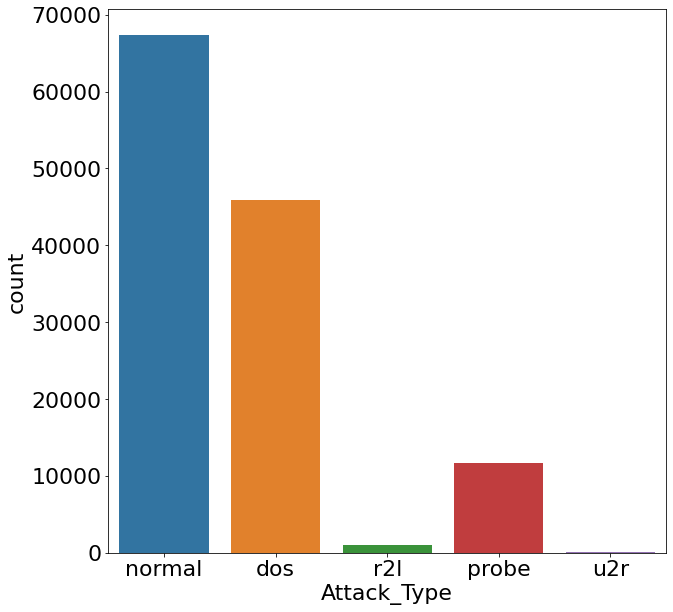

In [356]:
# Use matplotlib and seaborn to visualize the attack types.

plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 22})
sns.countplot(x = 'Attack_Type', data=train2)

In [357]:
train3 = train2 # Create a new variable (train3) from the existing variable (train2)

In [358]:
# Map all attack categories to a single variable so we have only two categories (attack and normal).
# Create a new feature (Traffic_Type).

train2_dict = {'r2l': "attack", 'dos': "attack", 'u2r': "attack", 'probe': "attack", 'normal': "normal"}
train3["Traffic_Type"] = train3["Attack_Type"].map(train2_dict)

In [359]:
train3 # display the new dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack_Type,Traffic_Type
0,0,1,20,2,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,normal
1,0,3,45,2,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,normal
2,0,1,50,4,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,attack
3,0,1,25,2,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,normal
4,0,1,25,2,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,50,4,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,dos,attack
125969,8,3,50,2,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,normal
125970,0,1,55,2,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,normal
125971,0,1,31,4,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,attack


In [360]:
train3 = train3.drop('Attack_Type', axis=1) # Drop the Attack_Type feature since it is now duplicated.

<AxesSubplot:xlabel='Traffic_Type', ylabel='count'>

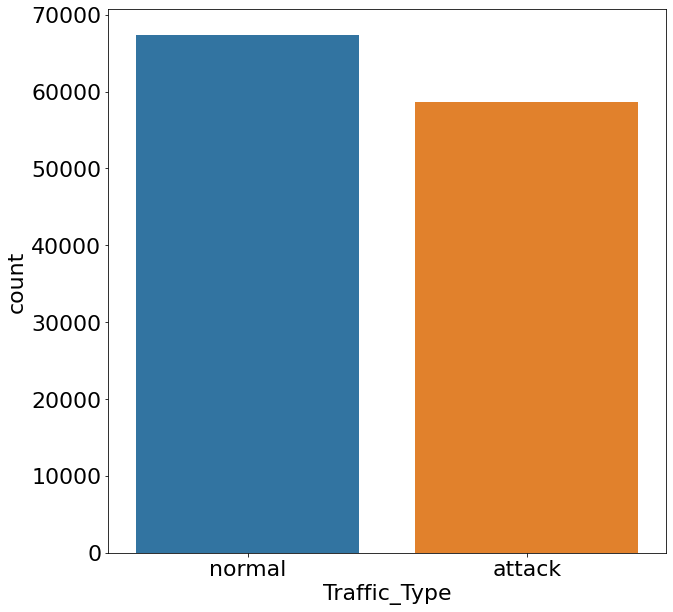

In [361]:
# Use matplotlib and seaborn to visualize the traffic types.

plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 22})
sns.countplot(x = 'Traffic_Type', data=train3)

In [362]:
# Count the data points in each category.
# normal = 53%
# attack = 47%

train3['Traffic_Type'].value_counts() 

normal    67343
attack    58630
Name: Traffic_Type, dtype: int64

In [363]:
train3['Traffic_Type'].dtypes # Check data type of the Traffic_Type feature

dtype('O')

In [364]:
# Change the data type in the Traffic_Type feature from catogorical to numerical values

train3_dict = {'attack': 0, 'normal': 1}
train3["Traffic_Type"] = train3["Traffic_Type"].map(train3_dict)

In [365]:
train3['Traffic_Type'].dtypes # Confirm data type of the Traffic_Type feature has changed to numerical.

dtype('int64')

In [366]:
train3 # Display the dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Traffic_Type
0,0,1,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,3,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,50,4,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0
125969,8,3,50,2,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,1
125970,0,1,55,2,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,1
125971,0,1,31,4,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0


In [367]:
train3.to_csv('Training_set.csv', index=False) # Save train3 to a csv file with the name Training_set.csv.

# Test Set

In [368]:
test = pd.read_csv("NSL_KDD_TEST.txt") # Read the test dataset into Jupyter note book

In [369]:
test # Display the dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,1,50,1,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1
1,0,1,50,1,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1
2,2,1,20,2,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,5
3,0,2,15,2,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,4
4,1,1,61,3,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,1,55,2,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,5
22539,0,1,25,2,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,5
22540,0,1,25,2,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1
22541,0,3,12,2,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,5


In [370]:
# Read the data again, a different variable (test2) is used to avoid changing the value of the original variable (test). 

test2 = pd.read_csv("NSL_KDD_TEST.txt")

In [371]:
# Map the numeric values of the xAttck feature to categorical values to aid visualization. 
# Create a new feature (Attack_Type) with the categorical values.

test_dict = {1: "dos", 2: "u2r", 3: "r2l", 4: "probe", 5: "normal"}
test2["Attack_Type"] = test["xAttack"].map(test_dict)

In [372]:
test2  # Display the dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack,Attack_Type
0,0,1,50,1,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1,dos
1,0,1,50,1,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1,dos
2,2,1,20,2,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,5,normal
3,0,2,15,2,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,4,probe
4,1,1,61,3,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,4,probe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,1,55,2,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,5,normal
22539,0,1,25,2,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,5,normal
22540,0,1,25,2,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1,dos
22541,0,3,12,2,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,5,normal


In [373]:
test2 = test2.drop('xAttack', axis=1) # Drop the xAttack feature since it is now duplicated.

<AxesSubplot:xlabel='Attack_Type', ylabel='count'>

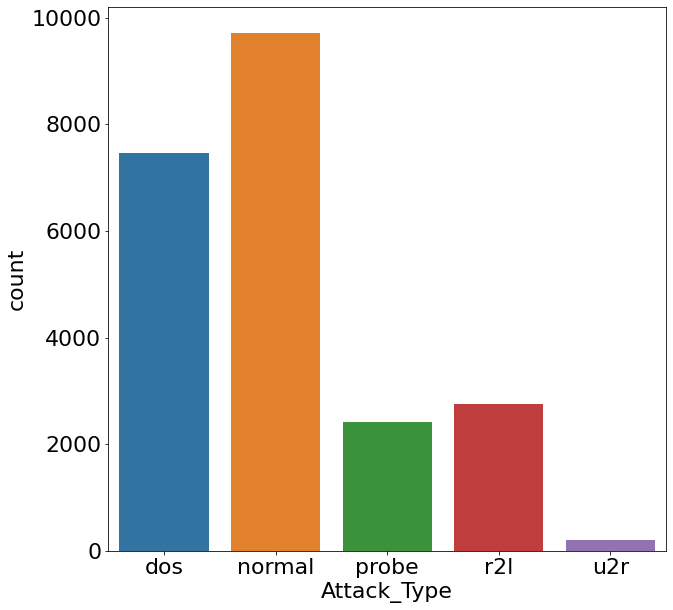

In [374]:
# Use matplotlib and seaborn to visualize the attack types.

plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 22})
sns.countplot(x = 'Attack_Type', data=test2)

In [375]:
test3 = test2 # Create a new variable (test3) from the existing variable (test2)

In [376]:
# Map all attack categories to a single variable so we have only two categories (attack and normal).
# Create a new feature (Traffic_Type).

test2_dict = {'r2l': "attack", 'dos': "attack", 'u2r': "attack", 'probe': "attack", 'normal': "normal"}
test3["Traffic_Type"] = test3["Attack_Type"].map(test2_dict)

In [377]:
test3  # Display the dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack_Type,Traffic_Type
0,0,1,50,1,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,dos,attack
1,0,1,50,1,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,dos,attack
2,2,1,20,2,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,normal
3,0,2,15,2,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,probe,attack
4,1,1,61,3,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,probe,attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,1,55,2,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,normal
22539,0,1,25,2,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,normal
22540,0,1,25,2,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,dos,attack
22541,0,3,12,2,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,normal


In [378]:
test3 = test3.drop('Attack_Type', axis=1) # Drop the Attack_Type feature since it is now duplicated.

In [379]:
# Count the data points in each category.
# normal = 57%
# attack = 43%

test3['Traffic_Type'].value_counts()

attack    12833
normal     9710
Name: Traffic_Type, dtype: int64

<AxesSubplot:xlabel='Traffic_Type', ylabel='count'>

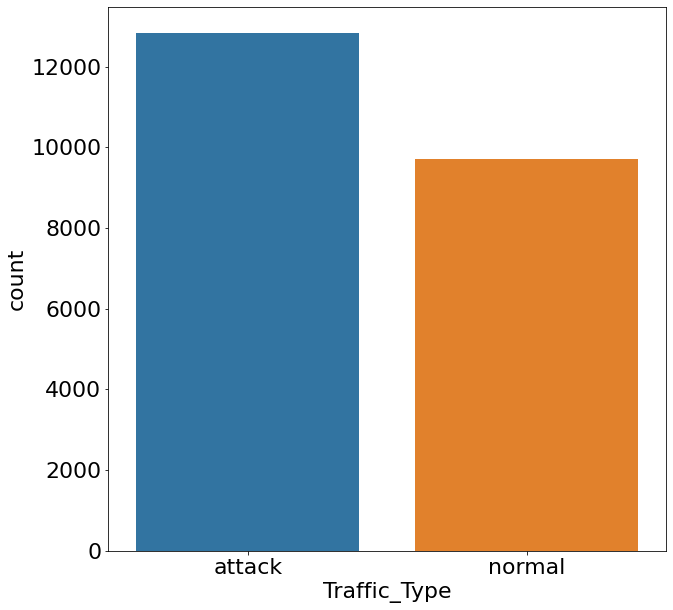

In [380]:
# Use matplotlib and seaborn to visualize the traffic types.

plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 22})
sns.countplot(x = 'Traffic_Type', data=test3)

In [381]:
# Map all attack categories to a single variable so we have only two categories (attack and normal).
# Create a new feature (Traffic_Type).

test3_dict = {'attack': 0, 'normal': 1}
test3["Traffic_Type"] = test3["Traffic_Type"].map(test3_dict)

In [382]:
test3 # Display the dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Traffic_Type
0,0,1,50,1,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,0
1,0,1,50,1,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,0
2,2,1,20,2,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,1
3,0,2,15,2,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,0
4,1,1,61,3,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,1,55,2,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,1
22539,0,1,25,2,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,1
22540,0,1,25,2,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,0
22541,0,3,12,2,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,1


In [383]:
test3.to_csv('Test_set.csv', index=False) # Save test3 to a csv file with the name Test_set.csv.